### 이진분류 예제 코드

In [110]:
import torch
from matplotlib import pyplot as plt
from pygments import highlight
from torch import nn
from torch import optim
from torchviz import make_dot
from matplotlib.colors import LightSource

### STEP 1. 데이터 정의

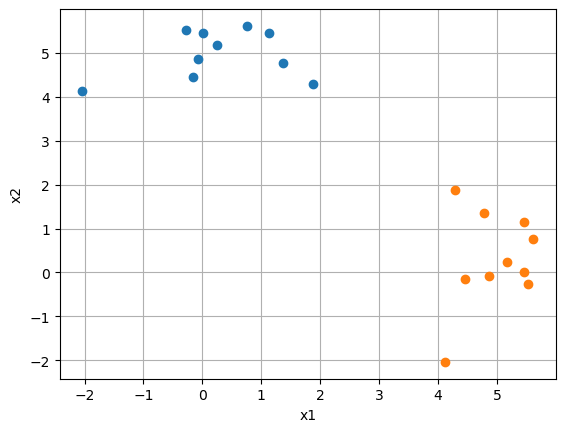

In [111]:
# case 1
N = 20
random0 = torch.randn(int(N/2),1)
random5 = torch.randn(int(N/2),1) + 5
class1_data = torch.hstack([random0,random5])
class2_data = torch.hstack([random5,random0])
class1_label = torch.ones(int(N/2), 1)
class2_label = torch.zeros(int(N/2), 1)
X = torch.vstack([class1_data, class2_data])
y = torch.vstack([class1_label, class2_label])

# case2
# N = 100
# radius1 = 0.3+0.05*torch.randn(int(N/2),1)
# radius2 = 1+0.01*torch.randn(int(N/2),1)
# theta1 = 2*torch.pi*torch.rand(int(N/2),1) - torch.pi
# theta2 = 2*torch.pi*torch.rand(int(N/2),1) - torch.pi
# class1_data = torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
# class2_data = torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
# class1_label=torch.ones(int(N/2), 1)
# class2_label=torch.zeros(int(N/2), 1)
# x=torch.vstack([class1_data, class2_data])
# y=torch.vstack([class1_label, class2_label])

plt.plot(class1_data[:,0], class1_data[:,1], 'o')
plt.plot(class2_data[:,0], class2_data[:,1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()



### STEP 2. 모델 정의

In [112]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        #case 1, plain
        # self.linear = nn.Sequential(nn.Linear(2, 100), # 10, 100, 1000, 10000 바꿔가보면서 확인
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1), # node 가 많을 수록 성능이 좋게 나온다
        #                             nn.Sigmoid())

        # case 1, very simple
        # self.linear = nn.Sequential(nn.Linear(2,1), # 아주 simple 한 것도 오히려 괜찮다
        #                             nn.Sigmoid())

        # # case 1, deep
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())

        # # case 2 , very deep
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             *[i for _ in range(10) for i in [nn.Linear(100, 100), nn.Sigmoid()]],
        #                             nn.Linear(100,1),
        #                             nn.Sigmoid())
        #
        # # case 2, very deep with relu
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.ReLU(),
        #                             *[i for _ in range(10) for i in [nn.Linear(100, 100), nn.ReLU()]],
        #                             nn.Linear(100,1),
        #                             nn.Sigmoid())


    def forward(self, x):
        x = self.linear(x)
        return x



In [113]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # 2개 값으로 이루 어진 좌표값 ( x1, x2 ) 데이터 5개 통과
print(model(torch.randn(5,2)))

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=100, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
torch.Size([5, 1])
tensor([[0.4569],
        [0.4571],
        [0.4569],
        [0.4572],
        [0.4570]], grad_fn=<SigmoidBackward0>)


### STEP 3.모델 학습시키기

In [114]:
LR = 1e-1 # case 1
# LR = 1e-2 # case 2, plain 에서 노드 천 개 , deep
#LR = 1e-4 # case 2, very deep relu
#EPOCH = 100 # case 1
EPOCH = 100 # case 2, plain 에서 노드 천 개 , deep, very deep relu

#optimizer = optim.SGD(model.parameters(), lr=LR) # case 1, deep
optimizer = optim.Adam(model.parameters(), lr=LR) # case 1, deep
# optimizer = optim.Adam(model.parameters(), lr=LR, eps=0, betas=(0.9, 0.99)) # 필기용
# optimizer = optim.Adam(model.parameters(), lr=LR, eps=1e-12, betas=(0.1, 0.1)) # 필기용
criterion = nn.BCELoss()

loss_history = []
grad_history = [] # 필기용
update_size_history = [] # 필기용

model.train() # train model 로 전환
for epoc in range(EPOCH):
    # inference
    y_hat = model(X)
    # loss
    loss = criterion(y_hat, y)
    # prev weight # 필기용
    # prev=model.linear[0].weight.detach().clone() # 필기용
    # update
    optimizer.zero_grad() # grdient 누적을 막기 위한 초기화
    loss.backward() # backpropagation
    optimizer.step() # weight update
    # update amount # 필기용
    # grad_history += [ torch.sum(torch.abs(model.linear[0].weight.grad)).item() ]
    # update_size_history += [ torch.sum(torch.abs(model.linear[0].weight.detach()-prev)).item() ] # 필기용
    # print_loss
    loss_history += [loss.item()]
    print(f"Epoch: {epoc+1}, train loss: {loss.item():.4f}")
    print("-"*20)

Epoch: 1, train loss: 0.6970
--------------------
Epoch: 2, train loss: 3.3434
--------------------
Epoch: 3, train loss: 0.9735
--------------------
Epoch: 4, train loss: 0.5703
--------------------
Epoch: 5, train loss: 0.7803
--------------------
Epoch: 6, train loss: 0.6805
--------------------
Epoch: 7, train loss: 0.5741
--------------------
Epoch: 8, train loss: 0.4887
--------------------
Epoch: 9, train loss: 0.3889
--------------------
Epoch: 10, train loss: 0.3262
--------------------
Epoch: 11, train loss: 0.2920
--------------------
Epoch: 12, train loss: 0.2689
--------------------
Epoch: 13, train loss: 0.2508
--------------------
Epoch: 14, train loss: 0.2351
--------------------
Epoch: 15, train loss: 0.2207
--------------------
Epoch: 16, train loss: 0.2072
--------------------
Epoch: 17, train loss: 0.1943
--------------------
Epoch: 18, train loss: 0.1821
--------------------
Epoch: 19, train loss: 0.1705
--------------------
Epoch: 20, train loss: 0.1595
----------

In [115]:
print(criterion(y_hat, y))
print(torch.sum(-torch.log(y_hat**y * ((1-y_hat)**(1-y)))) / N)
print(criterion(torch.tensor([0.]), torch.tensor([1.]))) # 100 이 최대 ( INF 가 나오는게 맞긴함.. torch 에서 정해놓은 max 값임 )
                                                         # loss 값 100 <=> 그래프 발산, 뭔가 잘못된 것

tensor(0.0112, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0112, grad_fn=<DivBackward0>)
tensor(100.)


Text(0, 0.5, 'Loss')

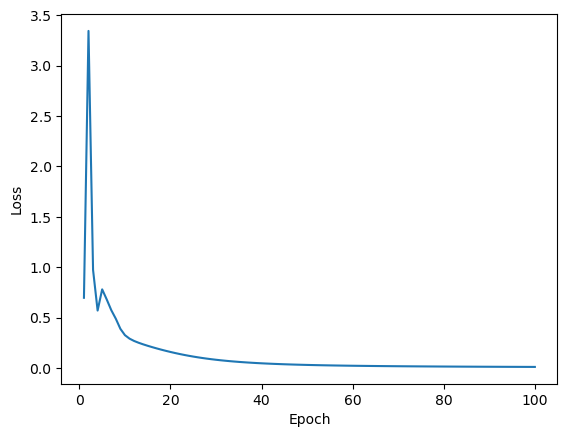

In [116]:
#plt.figure(figsize=(6,9)) # 필기용
#plt.subplot(2,1,1) # 필기용
plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plt.subplot(2,1,2) # 필기용
# plt.plot(range(1, EPOCH+1), grad_history) # 필기용
# plt.xlabel("Epoch") # 필기용
# plt.ylabel("grad size") # 필기용

### STEP 4.모델 테스트하기

Text(0.5, 0.5, 'x2')

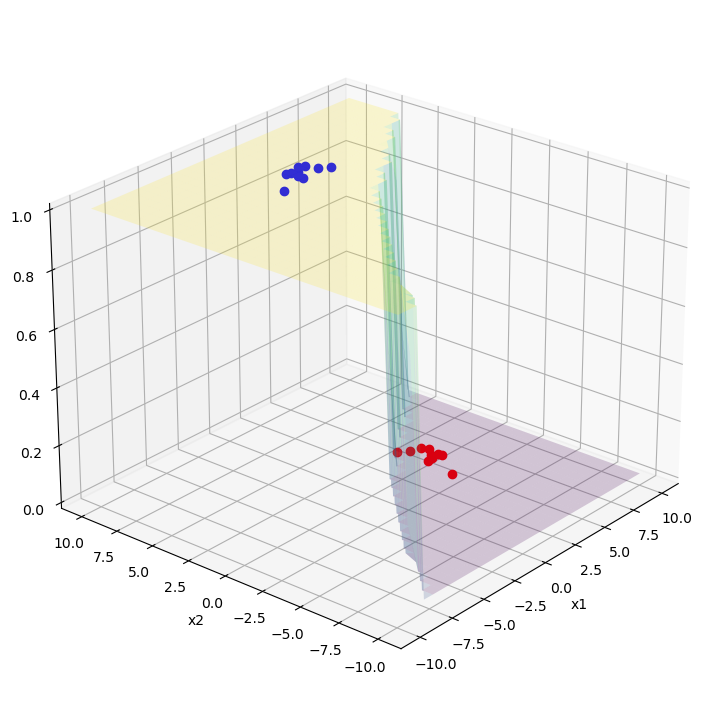

In [117]:
x1_test = torch.linspace(-10, 10, 30) # case 1
x2_test = torch.linspace(-10, 10, 30) # case 1
# x1_test = torch.linspace(-2, 2, 30) # case 2
# x2_test = torch.linspace(-2, 2, 30) # case 2
X1_test, X2_test = torch.meshgrid(x1_test, x2_test)
X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)

#print(X_test)

model.eval() # test mode 로 # 1. 해결
with torch.no_grad(): # 2. 해결
    y_hat = model(X_test)
    #1. dropout 혹은 BN 같은 것을 사용했다면 train mode 와 test mode 의 동작이 다르므로 eval() 로 mode 를 바꿔줘야함
    #2. grad_fn 계산 <- 메모리가 불필요하게 사용됨
Y_hat = y_hat.squeeze()

# print(model.training)
# model.train()
# print(model.training)

plt.figure(figsize=[10, 9]) # figsize = [가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25, azim=-140)
# ls = LightSource(azdeg=45, altdeg=35)
# rgb = ls.shade(Y_hat.numpy(), plt.cm.RdYlBu) # 필기용
# ax.plot_surface(X1_test,X2_test, Y_hat.numpy(), facecolors=rgb, alpha=0.2) # 필기용
ax.plot_surface(X1_test,X2_test, Y_hat.numpy(), cmap="viridis", alpha=0.2)
ax.plot(
    class1_data[:, 0].detach().cpu().numpy(),
    class1_data[:, 1].detach().cpu().numpy(),
    class1_label.squeeze().detach().cpu().numpy(),
    'bo'
)
ax.plot(
    class2_data[:, 0].detach().cpu().numpy(),
    class2_data[:, 1].detach().cpu().numpy(),
    class2_label.squeeze().detach().cpu().numpy(),
    'ro'
)
plt.xlabel('x1')
plt.ylabel('x2')


In [118]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale='viridis', opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor = "limegreen",project_z=True))
fig.update_layout(title="binary classification", width=700, height=600)